In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


1. Download global temperature anomaly from 1850 to the present. Temperatures should be monthly. https://www.ncei.noaa.gov/access/monitoring/climate-at-a-glance/global/time-series/globe/land/1/8/1850-2023

2. Import the temperature data into a python notebook. (2)

In [3]:
import pandas as pd

file_path = '/content/drive/MyDrive/ColabNotebooks/ITP359/HW8/data.csv'

temperature_data = pd.read_csv(file_path, skiprows=4)
print(temperature_data.head())

     Date  Anomaly
0  185001    -1.26
1  185002    -0.54
2  185003    -0.46
3  185004    -0.96
4  185005    -0.81


3. Set the Year column as the index. (2)

In [5]:
temperature_data.set_index('Date')

,Anomaly
Date,
185001,-1.26
185002,-0.54
185003,-0.46
185004,-0.96
185005,-0.81
...,...
202405,1.67
202406,1.76
202407,1.73


4. Plot the temperature anomaly vs year. (2)

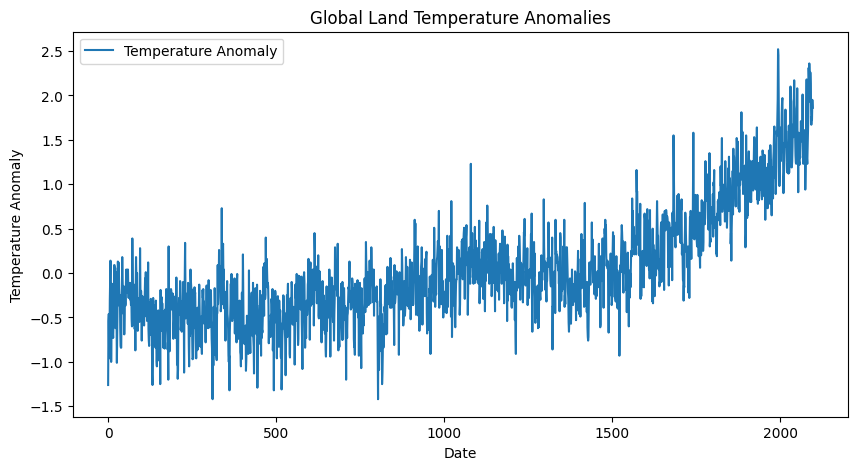

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.plot(temperature_data.index, temperature_data['Anomaly'], label='Temperature Anomaly')
plt.title('Global Land Temperature Anomalies')
plt.xlabel('Date')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.show()

5. Partition the dataset into train and test. E.g. Train partition is from 1850 to 1999. Test partition is from 2000 to 2023 (2)

In [8]:
#Partition
train_data = temperature_data[temperature_data.index <= 1999]
test_data = temperature_data[temperature_data.index >= 2000]

print("Train Data:")
print(train_data.head())
print("\nTest Data:")
print(test_data.head())

Train Data:
     Date  Anomaly
0  185001    -1.26
1  185002    -0.54
2  185003    -0.46
3  185004    -0.96
4  185005    -0.81

Test Data:
        Date  Anomaly
2000  201609     1.46
2001  201610     1.26
2002  201611     1.64
2003  201612     1.51
2004  201701     1.80


6. Create sequences of monthly temperatures. You may use a window of size 24.


In [11]:
import tensorflow as tf

train_array = train_data['Anomaly']
test_array = test_data['Anomaly']

seq_length = 24

train_ds = tf.keras.utils.timeseries_dataset_from_array(
    train_array.to_numpy(),
    targets = train_array[seq_length:],
    sequence_length = seq_length,
    batch_size = 32
)
test_ds = tf.keras.utils.timeseries_dataset_from_array(
    test_array.to_numpy(),
    targets = test_array[seq_length:],
    sequence_length = seq_length,
    batch_size = 32
)

7. Build a keras RNN network.


In [12]:
model = tf.keras.Sequential()
model.add(tf.keras.layers.Input(shape=(None,1)))
model.add(tf.keras.layers.SimpleRNN(32))
model.add(tf.keras.layers.Dense(1))

model.compile(loss='mse', optimizer = 'sgd', metrics = ['mse', 'mae'])

8. Train the RNN on the train partition by using sequences (use 24-month long sequences) of temperature time series. (4)

In [13]:
history = model.fit(train_ds, validation_data=test_ds, epochs=50)

Epoch 1/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 5s 33ms/step - loss: 0.1153 - mae: 0.2711 - mse: 0.1153 - val_loss: 0.1283 - val_mae: 0.2708 - val_mse: 0.1283
Epoch 2/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0879 - mae: 0.2331 - mse: 0.0879 - val_loss: 0.1251 - val_mae: 0.2695 - val_mse: 0.1251
Epoch 3/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0804 - mae: 0.2221 - mse: 0.0804 - val_loss: 0.1249 - val_mae: 0.2700 - val_mse: 0.1249
Epoch 4/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0794 - mae: 0.2204 - mse: 0.0794 - val_loss: 0.1242 - val_mae: 0.2695 - val_mse: 0.1242
Epoch 5/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0798 - mae: 0.2212 - mse: 0.0798 - val_loss: 0.1214 - val_mae: 0.2664 - val_mse: 0.1214
Epoch 6/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 10ms/step - loss: 0.0807 - mae: 0.2223 - mse: 0.0807 - val_loss: 0.1174 - val_mae: 0.2620 - val_mse: 0.1174
Epoch 7/50
62/62 ━━━━━━━━━━━━━━━━━━━━ 1s 9ms/step - loss: 0.0813 - mae: 0.2230 - mse: 0.0813 - val_loss: 0.113

9. Now forecast the temperature for 12 months in the test partition. (4)


In [14]:
import numpy as np

last_sequence = test_array[-24:]
predicted_temperatures = []

#next 12 mounth
for _ in range(12):
    # predict next month
    predicted_temperature = model.predict(np.expand_dims(last_sequence, axis=0))

    predicted_temperatures.append(predicted_temperature.flatten()[0])
    # update sequence
    last_sequence = np.roll(last_sequence, -1)
    last_sequence[-1] = predicted_temperature

print(predicted_temperatures)


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 331ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step


<ipython-input-14-84b69c34ed35>:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  last_sequence[-1] = predicted_temperature


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
[1.590355, 1.4613358, 1.4333867, 1.4074821, 1.4195114, 1.405696, 1.3995155, 1.3743304, 1.3808988, 1.3965899, 1.402619, 1.4107102]


10. Plot the forecasted vs the actual temperature. (4)


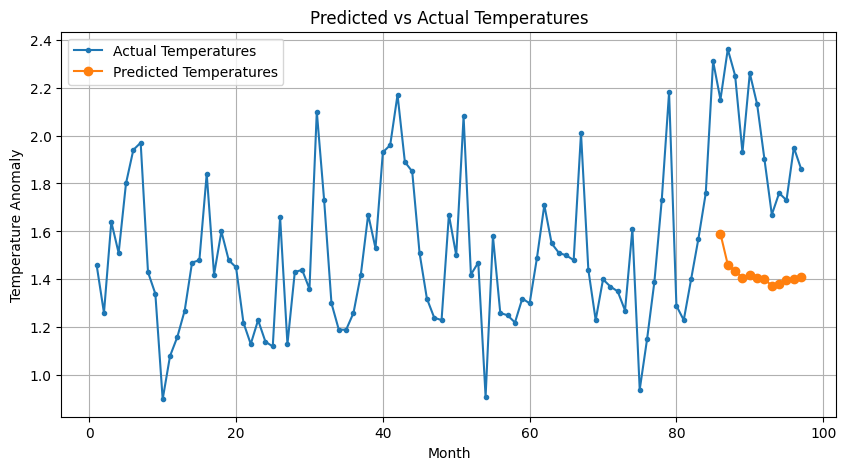

In [25]:
# all actual temperaturs & month
actual_temperatures = test_data['Anomaly'].values
months = range(1, len(actual_temperatures) + 1)

plt.figure(figsize=(10, 5))
plt.plot(months, actual_temperatures, label='Actual Temperatures', marker='.')
#prediction of the last 12 month
plt.plot(months[-12:], predicted_temperatures, label='Predicted Temperatures', marker='o')
plt.title('Predicted vs Actual Temperatures')
plt.xlabel('Month')
plt.ylabel('Temperature Anomaly')
plt.legend()
plt.grid(True)
plt.show()